# Exploratory Analysis

In this notebook, I will explore the global unicorn landscape geographically and temporally. Questions I aim to answer include:
- Where are the unicorns located?
- Which are the countries with highest total valuation from their unicorns?
- How have the landscape of unicorns changed over time by country and industry?
- Which countries and industries are most valuation concentrated in?

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import squarify

In [2]:
df = pd.read_excel("CB-Insights_Global-Unicorn-Club_2025.xlsx",
                   sheet_name="Unicorns",
                   skiprows=2,
                   usecols="B:H").dropna()

df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,SpaceX,350.0,2012-12-01,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
1,ByteDance,300.0,2017-04-07,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
2,OpenAI,300.0,2019-07-22,United States,San Francisco,Enterprise Tech,"Khosla Ventures, Thrive Capital, Sequoia Capital"
3,Stripe,70.0,2014-01-23,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
5,Databricks,62.0,2019-02-05,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, New Enterprise Associates..."
...,...,...,...,...,...,...,...
1300,LeadSquared,1.0,2022-06-21,India,Bengaluru,Enterprise Tech,"Gaja Capital Partners, Stakeboat Capital, West..."
1301,FourKites,1.0,2022-06-21,United States,Chicago,Enterprise Tech,"Hyde Park Venture Partners, Bain Capital Ventu..."
1302,VulcanForms,1.0,2022-07-05,United States,Burlington,Industrials,"Eclipse Ventures, D1 Capital Partners, Industr..."
1303,SingleStore,1.0,2022-07-12,United States,San Francisco,Enterprise Tech,"Google Ventures, Accel, Data Collective"


## 1. Overview

In [4]:
len(df["Company"].unique())

1228

In [16]:
country_counts = df.groupby("Country").size().reset_index(name="Unicorn Count")
country_counts = country_counts.sort_values(by="Unicorn Count", ascending=False)

In [17]:
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Unicorn Count',
    color_continuous_scale='Blues',
    title='Number of Unicorns by Country'
)
fig.show()

## 2. Where do unicorns live?

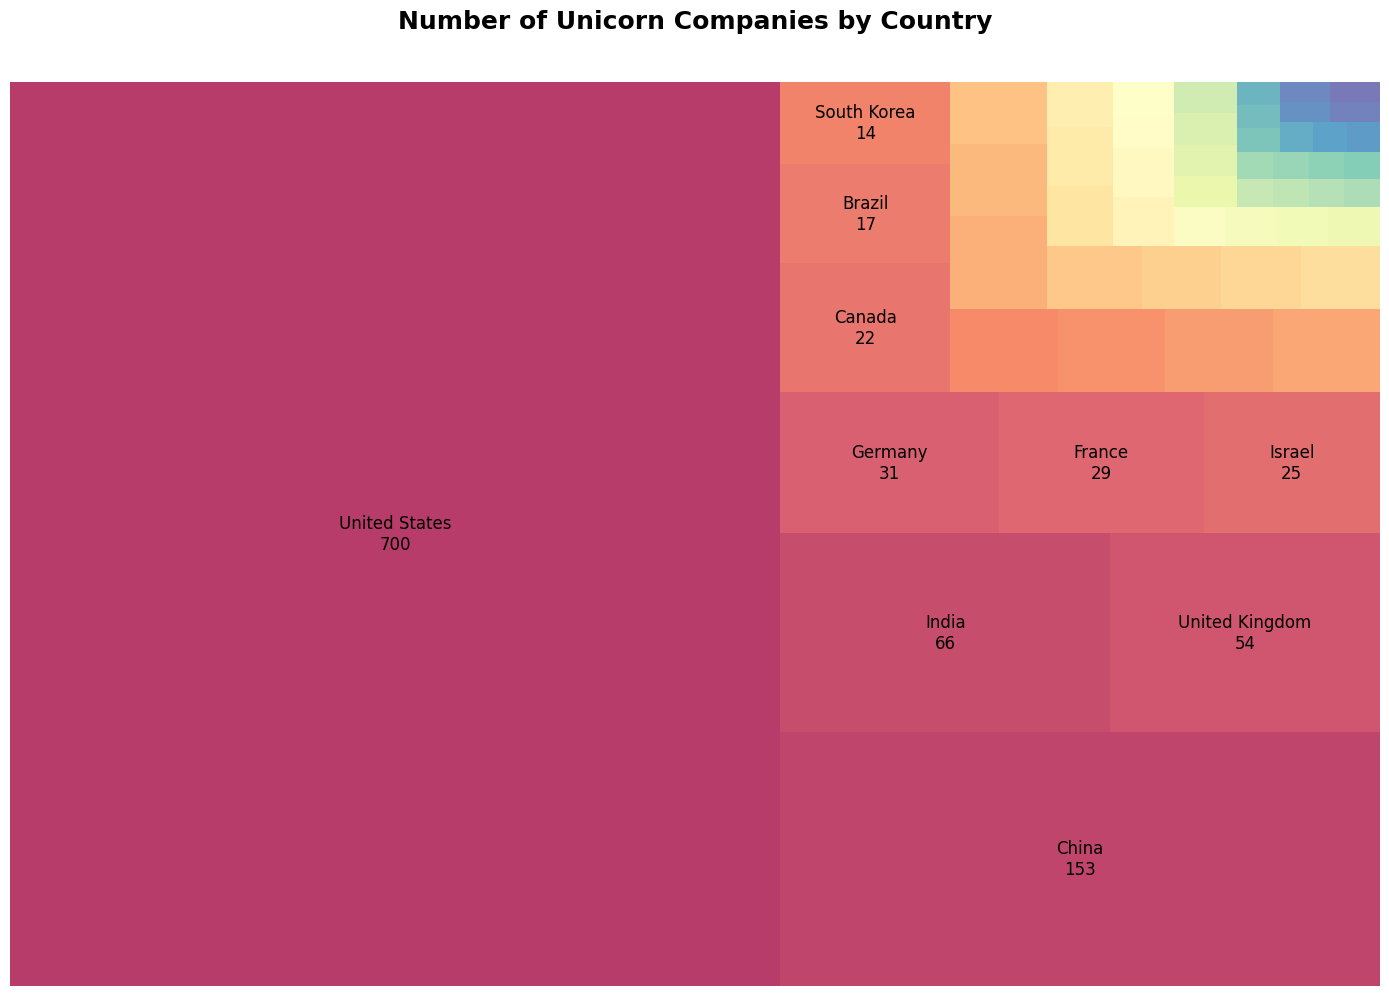

In [22]:
top10_by_count = country_counts["Country"].head(10).tolist()
labels = [
    f"{country}\n{count}" if country in top10_by_count else ""
    for country, count in zip(country_counts['Country'], country_counts['Unicorn Count'])
]

colors = sns.color_palette("Spectral", n_colors=len(country_counts))

plt.figure(figsize=(14, 10))
squarify.plot(
    sizes=country_counts['Unicorn Count'],
    label=labels,  
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize':12, 'family':'sans-serif'}
)

plt.axis('off')
plt.title('Number of Unicorn Companies by Country', 
          fontsize=18, 
          weight='bold',
          y=1.05)
plt.tight_layout()
plt.show()

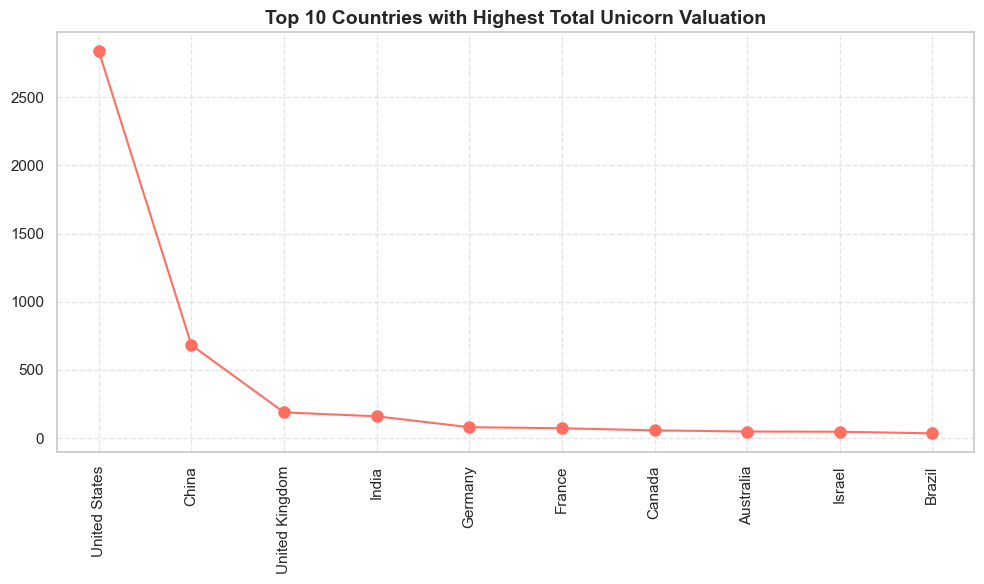

In [ ]:
total_valuation = df.groupby("Country")["Valuation ($B)"].agg("sum").reset_index()
top10_by_valuation = total_valuation.sort_values(by="Valuation ($B)", ascending=False).head(10)
top10_by_valuation.columns = ["Country", "Total Valudation ($B)"]

plt.figure(figsize=(10, 6))
plt.plot(top10_by_valuation["Country"],
        top10_by_valuation["Total Valudation ($B)"],
        color="#FF6F61",
        marker="o",
        markersize=8,
        linestyle="-")
plt.title("Top 10 Countries with Highest Total Unicorn Valuation",
               size=14, weight="bold")

plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 3. The unicorn boom over time

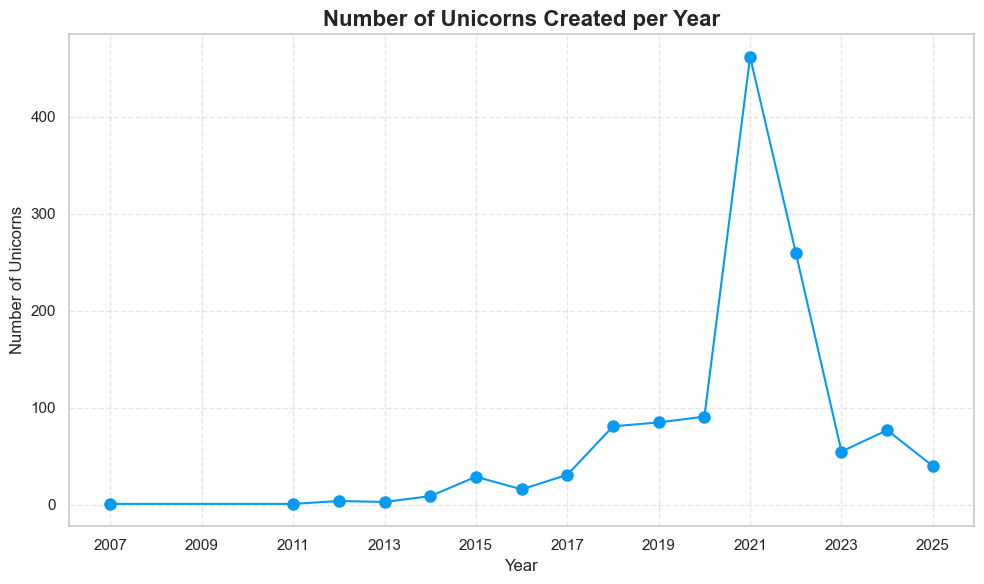

In [104]:
df["Year"] = df["Date Joined"].dt.year.astype(int)
unicorns_by_year = df.groupby("Year").size().reset_index(name="Unicorn Count")
years = df["Year"].tolist()

plt.figure(figsize=(10, 6))
plt.plot(unicorns_by_year["Year"],
        unicorns_by_year["Unicorn Count"],
        marker="o",
        markersize=8,
        linestyle='-',
        color='#069AF3')
plt.title('Number of Unicorns Created per Year', fontsize=16, weight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')

plt.xticks(
    ticks=np.arange(min(years), max(years)+1, 2),
    labels=np.arange(min(years), max(years)+1, 2)
)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [110]:
top10_by_count

['United States',
 'China',
 'India',
 'United Kingdom',
 'Germany',
 'France',
 'Israel',
 'Canada',
 'Brazil',
 'South Korea']

/opt/anaconda3/envs/homl3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/var/folders/by/cb09r0vj7j14skmqlxggctqr0000gn/T/ipykernel_3569/552976585.py:24: UserWarning:

The figure layout has changed to tight



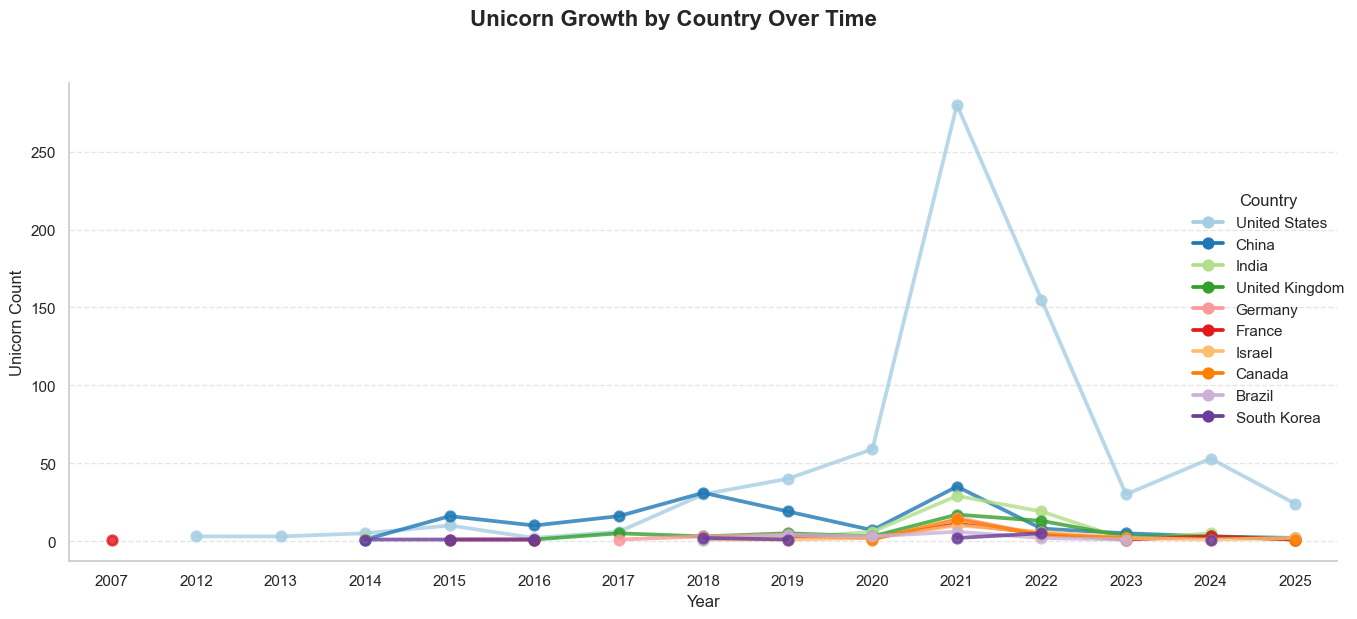

In [120]:
unicorns_by_country_year = df.groupby(["Year", "Country"]).size().reset_index(name="Unicorn Count")
subset_by_country_year = unicorns_by_country_year[unicorns_by_country_year["Country"].isin(top10_by_count)]

g = sns.catplot(
    x="Year", 
    y="Unicorn Count",
    data=subset_by_country_year,
    kind="point",
    hue="Country",
    hue_order=top10_by_count,
    palette='Paired',
    height=6, aspect=2,
    markers="o", linestyles="-"
)
for ax in g.axes.flat:
    for line in ax.lines:
        line.set_alpha(0.8)
    for col in ax.collections:
        col.set_alpha(0.8) 

g.set_axis_labels("Year", "Unicorn Count")
g.fig.suptitle("Unicorn Growth by Country Over Time", y=1.03, fontsize=16, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [117]:
subset_by_country_year[subset_by_country_year["Country"] == "France"]

,Year,Country,Unicorn Count
0,2007,France,1
11,2015,France,1
15,2016,France,1
47,2019,France,3
62,2020,France,2
83,2021,France,11
117,2022,France,5
146,2023,France,1
158,2024,France,3
172,2025,France,1


In [121]:
subset_by_country_year[subset_by_country_year["Country"] == "United Kingdom"]

,Year,Country,Unicorn Count
18,2016,United Kingdom,1
25,2017,United Kingdom,5
41,2018,United Kingdom,3
56,2019,United Kingdom,5
70,2020,United Kingdom,3
103,2021,United Kingdom,17
138,2022,United Kingdom,13
154,2023,United Kingdom,3
167,2024,United Kingdom,3
181,2025,United Kingdom,1


/opt/anaconda3/envs/homl3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/var/folders/by/cb09r0vj7j14skmqlxggctqr0000gn/T/ipykernel_3569/284315449.py:22: UserWarning:

The figure layout has changed to tight



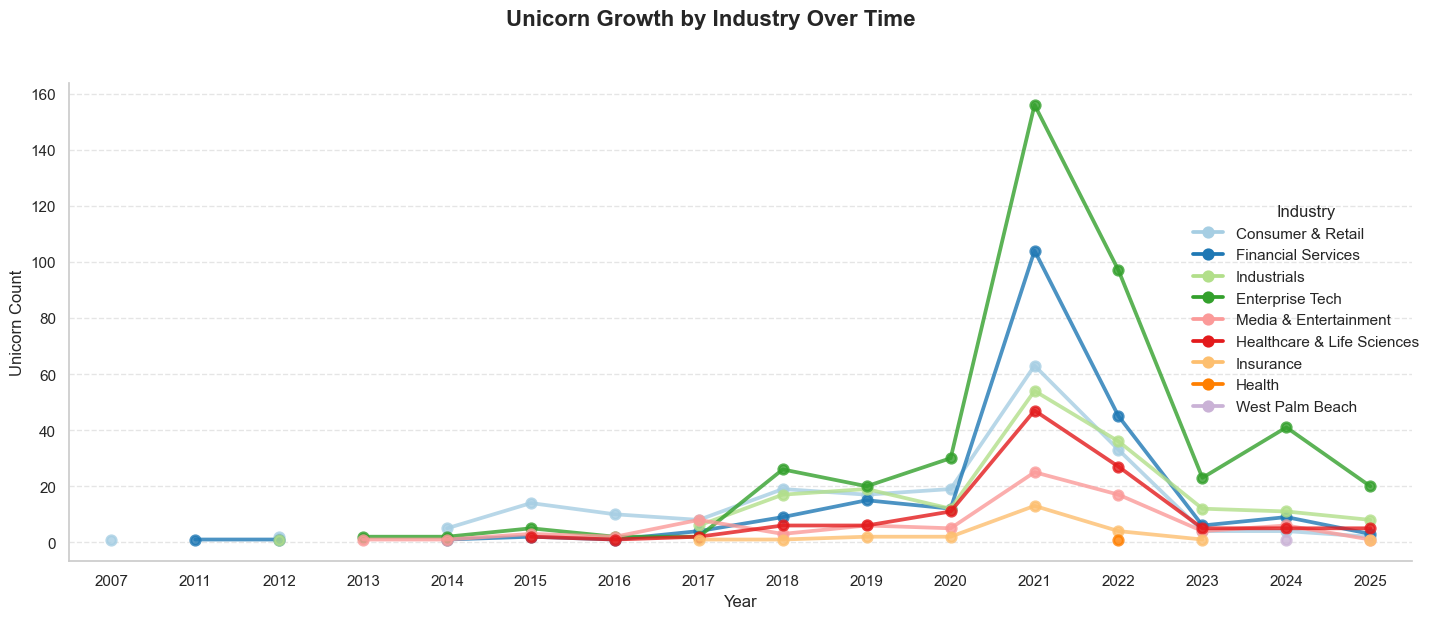

In [125]:
unicorns_by_industry_year = df.groupby(["Year", "Industry"]).size().reset_index(name="Unicorn Count")

g = sns.catplot(
    x="Year", 
    y="Unicorn Count",
    data=unicorns_by_industry_year,
    kind="point",
    hue="Industry",
    palette='Paired',
    height=6, aspect=2,
    markers="o", linestyles="-"
)
for ax in g.axes.flat:
    for line in ax.lines:
        line.set_alpha(0.8)
    for col in ax.collections:
        col.set_alpha(0.8) 

g.set_axis_labels("Year", "Unicorn Count")
g.fig.suptitle("Unicorn Growth by Industry Over Time", y=1.03, fontsize=16, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 4. Where is the money?

In [131]:
valuation_sum = pd.DataFrame(df.groupby("Country")["Valuation ($B)"].agg("sum")).reset_index()
valuation_sum = valuation_sum.sort_values("Valuation ($B)", ascending=False)
valuation_sum.columns = ["Country", "Total Valuation ($B)"]
valuation_sum

,Country,Total Valuation ($B)
51,United States,2835.20
8,China,682.01
50,United Kingdom,189.00
22,India,160.53
19,Germany,80.66
18,France,72.86
5,Canada,57.45
1,Australia,48.84
25,Israel,47.44
4,Brazil,35.59


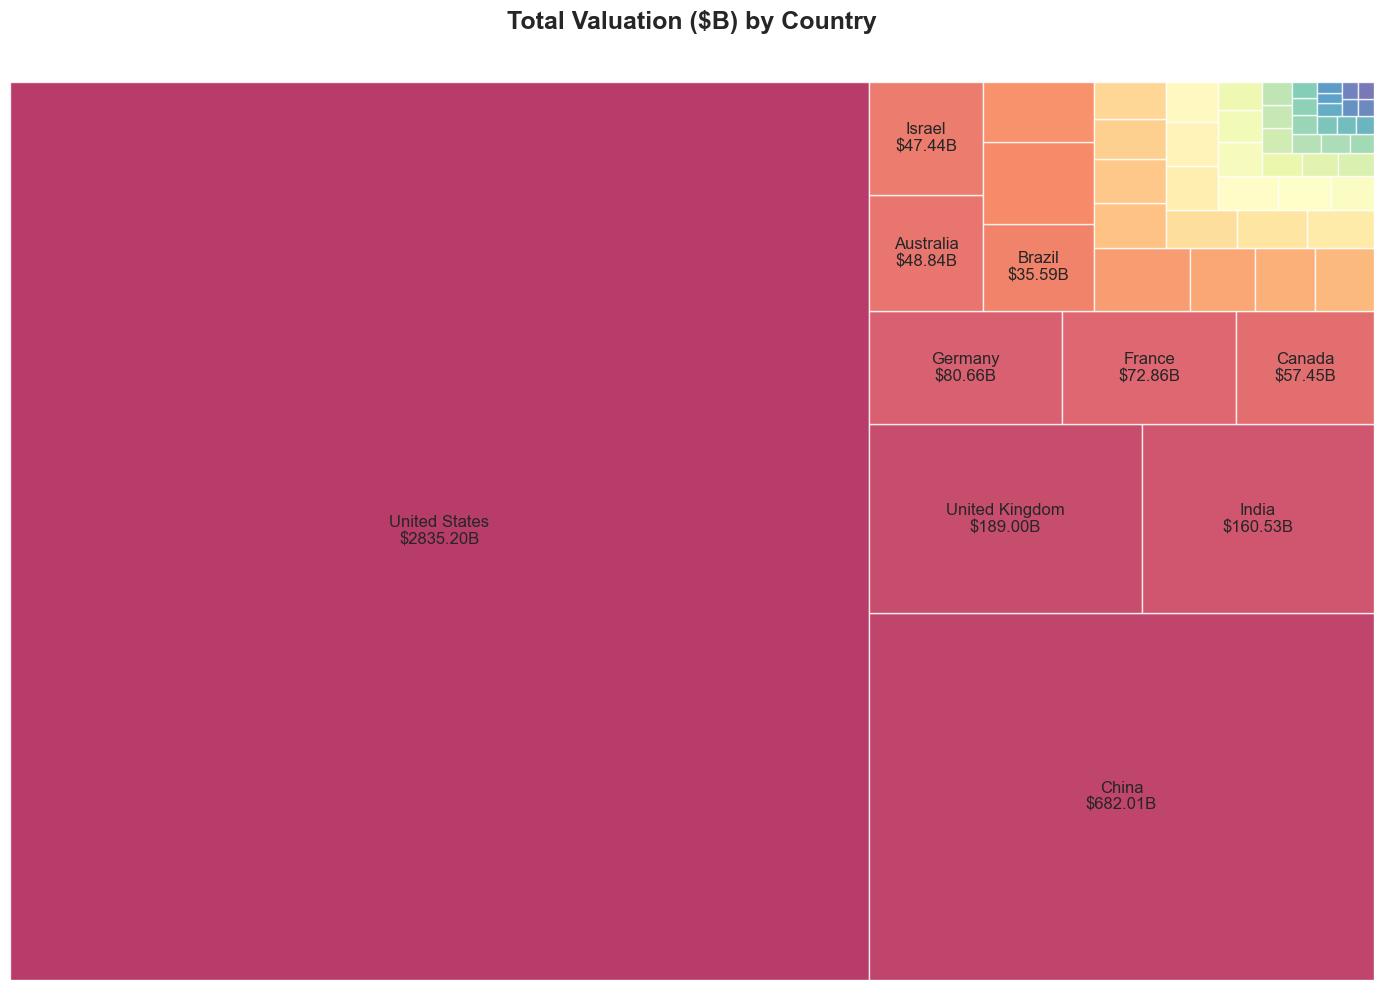

In [138]:
top10_by_valuation = valuation_sum["Country"].head(10).tolist()
labels = [
    f"{country}\n${total_valuation:.2f}B" if country in top10_by_valuation else ""
    for country, total_valuation in zip(valuation_sum['Country'], valuation_sum['Total Valuation ($B)'])
]

colors = sns.color_palette("Spectral", n_colors=len(valuation_sum))

plt.figure(figsize=(14, 10))
squarify.plot(
    sizes=valuation_sum['Total Valuation ($B)'],
    label=labels,  
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize':12, 'family':'sans-serif'}
)

plt.axis('off')
plt.title('Total Valuation ($B) by Country', 
          fontsize=18, 
          weight='bold',
          y=1.05)
plt.tight_layout()
plt.show()

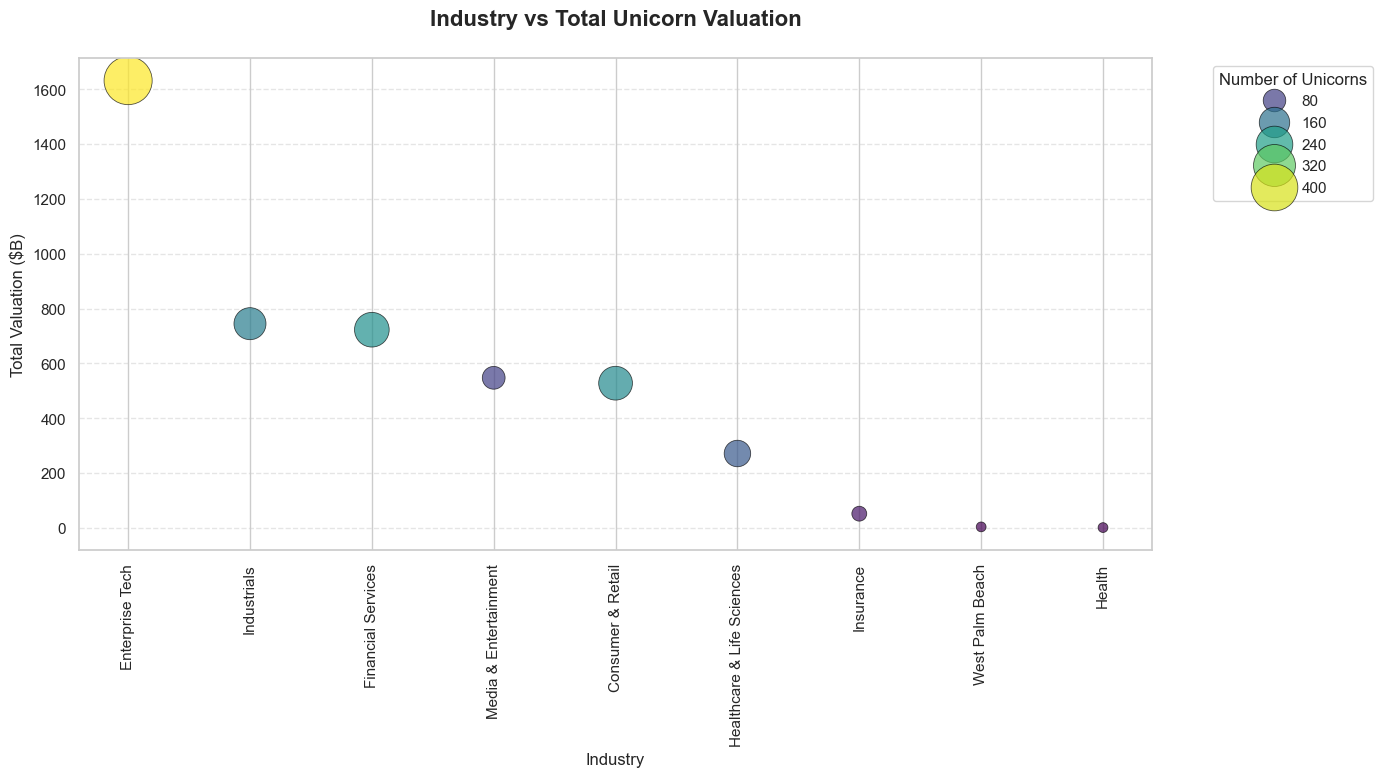

In [149]:
industry_stats = df.groupby("Industry").agg(
    total_valuation=('Valuation ($B)', 'sum'),
    company_count=('Company', 'count')
).reset_index()
industry_stats = industry_stats.sort_values('total_valuation', ascending=False)

plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    x="Industry",
    y="total_valuation",
    hue="company_count",
    size="company_count",      
    sizes=(50, 1200),          
    data=industry_stats,
    palette="viridis",
    alpha=0.7,
    edgecolor="black"
)

plt.xticks(rotation=90)
plt.title("Industry vs Total Unicorn Valuation", fontsize=16, weight='bold', y=1.05)
plt.ylabel("Total Valuation ($B)")
plt.xlabel("Industry")

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title="Number of Unicorns", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()